In [1]:
#importing the libraries

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#reading the csv file
data_csv = pd.read_csv("data/structured_data/data.csv")
data_csv

,Country,Age,Salary,Purchased,Price Category Of Purchase
0,France,44.0,72000.0,No,1
1,Spain,27.0,48000.0,Yes,1
2,Germany,30.0,54000.0,No,2
3,Spain,38.0,61000.0,No,3
4,Germany,40.0,NaN,Yes,1
5,France,35.0,58000.0,Yes,2
6,Spain,NaN,52000.0,No,3
7,France,48.0,79000.0,Yes,1
8,Germany,50.0,83000.0,No,2
9,France,37.0,67000.0,Yes,2


In [3]:
#classify columns into 2 groups - numerical and categorical

df_numerical = data_csv.select_dtypes(include=[np.number])
df_categorical = data_csv.select_dtypes(exclude=[np.number])

In [4]:
#print the column names

print("Numerical Column names : ", df_numerical.columns.values)
print("Numerical dataframe : \n", df_numerical)
print("Shape : ", df_numerical.shape)

print("\n============================================================================\n")

print("Categorical Columns names : ", df_categorical.columns.values)
print("Categorical dataframe : \n", df_categorical)
print("Shape : ", df_categorical.shape)

Numerical Column names :  ['Age' 'Salary' 'Price Category Of Purchase']
Numerical dataframe : 
      Age   Salary  Price Category Of Purchase
0   44.0  72000.0                           1
1   27.0  48000.0                           1
2   30.0  54000.0                           2
3   38.0  61000.0                           3
4   40.0      NaN                           1
5   35.0  58000.0                           2
6    NaN  52000.0                           3
7   48.0  79000.0                           1
8   50.0  83000.0                           2
9   37.0  67000.0                           2
10  18.0  54400.0                           3
11  22.0  55000.0                           3
12   NaN  58800.0                           1
13  28.0  42000.0                           3
14  24.0  41000.0                           2
15  35.0  69000.0                           1
16  32.0  67000.0                           3
17  38.0  65000.0                           3
18  45.0      NaN             

In [5]:
#number of missing values

df_missing = data_csv.isnull().sum().to_frame()
df_missing.columns = ["No. of missing values"]
df_missing

,No. of missing values
Country,0
Age,2
Salary,3
Purchased,0
Price Category Of Purchase,0


In [6]:
#we can observe that there are 2 missing values in age and 3 missing values in salary.

print("Data type of Age column : ", data_csv['Age'].dtype)
print("Data type of Salary column : ", data_csv['Salary'].dtype)

Data type of Age column :  float64
Data type of Salary column :  float64


In [7]:
#we can replace NaN with 0.0
data_csv = data_csv.fillna(0.0)
print("After handling missing values : \n", data_csv)

After handling missing values : 
     Country   Age   Salary Purchased  Price Category Of Purchase
0    France  44.0  72000.0        No                           1
1     Spain  27.0  48000.0       Yes                           1
2   Germany  30.0  54000.0        No                           2
3     Spain  38.0  61000.0        No                           3
4   Germany  40.0      0.0       Yes                           1
5    France  35.0  58000.0       Yes                           2
6     Spain   0.0  52000.0        No                           3
7    France  48.0  79000.0       Yes                           1
8   Germany  50.0  83000.0        No                           2
9    France  37.0  67000.0       Yes                           2
10   France  18.0  54400.0        No                           3
11  Germany  22.0  55000.0       Yes                           3
12  Germany   0.0  58800.0       Yes                           1
13   France  28.0  42000.0        No                    

In [8]:
#df is the original csv data file
df = data_csv

In [9]:
#encoding yes/no as 1/0
%timeit
data_csv['Purchased'] = data_csv['Purchased'].map({'Yes' : 1, 'No' : 0})
data_csv

,Country,Age,Salary,Purchased,Price Category Of Purchase
0,France,44.0,72000.0,0,1
1,Spain,27.0,48000.0,1,1
2,Germany,30.0,54000.0,0,2
3,Spain,38.0,61000.0,0,3
4,Germany,40.0,0.0,1,1
5,France,35.0,58000.0,1,2
6,Spain,0.0,52000.0,0,3
7,France,48.0,79000.0,1,1
8,Germany,50.0,83000.0,0,2
9,France,37.0,67000.0,1,2


In [10]:
#standardize the numerical columns

df_numerical = df_numerical.fillna(0.0)


<h3>Standardization vs Normalization : </h3>
<hr>
<a href="https://medium.com/@rrfd/standardize-or-normalize-examples-in-python-e3f174b65dfc"> <button>Link 1</button></a>

<a href="https://towardsai.net/p/data-science/how-when-and-why-should-you-normalize-standardize-rescale-your-data-3f083def38ff#:~:text=For%20machine%20learning%2C%20every%20dataset,from%200%E2%80%93100%2C000%20and%20higher"><button>Link 2</button></a>

1. Normalization makes the training less sensitive to the scale of features, so we better solve for coefficients.

z = (x - min(x)) / (max(x) - min(x))

2. Normalization makes the data better conditioned for convergence.

3. Normalization will ensure that a convergence problem does not have a massive variance, making optimization feasible.

Note : If the data provided is proportional, so normalizing might not provide correct estimators.

There is some debate stating it is better to have the input values centred around 0 rather than between 0 and 1.

1. Standardization is rescaling the data to have a mean = 0 and std dev = 1.

z = (x - myu) / sigma

2. Standardization is done to compare features that have different units or scales.


In [11]:
#description of the data. 
#we can observe that there is a huge difference in the age and salary values.

df_numerical.describe()

,Age,Salary,Price Category Of Purchase
count,20.000000,20.000000,20.000000
mean,30.800000,51310.000000,2.000000
std,13.659776,24622.922568,0.858395
min,0.000000,0.000000,1.000000
25%,24.750000,46500.000000,1.000000
50%,33.500000,56500.000000,2.000000
75%,38.500000,67000.000000,3.000000
max,50.000000,83000.000000,3.000000


In [12]:
#standardizing data
#since the values cannot be negative, so we make use of min-max scaler.

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

col_names = ['Age', 'Salary']

df_numerical_scaled = scaler.fit_transform(df_numerical[col_names])
print("type of object returned : ", type(df_numerical_scaled))

#now we need to convert this into a dataframe.

df_numerical_scaled = pd.DataFrame(df_numerical_scaled, columns=col_names)
df_numerical_scaled['Price Category Of Purchase'] = df_numerical['Price Category Of Purchase']

type of object returned :  <class 'numpy.ndarray'>


In [13]:
print("Original numerical dataframe : \n", df_numerical)
print("\n===============================================================\n")
print(df_numerical.describe())
print("\n===============================================================\n")
print("After normalizing values : \n", df_numerical_scaled)
print("\n===============================================================\n")
print(df_numerical_scaled.describe())

Original numerical dataframe : 
      Age   Salary  Price Category Of Purchase
0   44.0  72000.0                           1
1   27.0  48000.0                           1
2   30.0  54000.0                           2
3   38.0  61000.0                           3
4   40.0      0.0                           1
5   35.0  58000.0                           2
6    0.0  52000.0                           3
7   48.0  79000.0                           1
8   50.0  83000.0                           2
9   37.0  67000.0                           2
10  18.0  54400.0                           3
11  22.0  55000.0                           3
12   0.0  58800.0                           1
13  28.0  42000.0                           3
14  24.0  41000.0                           2
15  35.0  69000.0                           1
16  32.0  67000.0                           3
17  38.0  65000.0                           3
18  45.0      0.0                           2
19  25.0      0.0                           1



In [14]:
import warnings
warnings.filterwarnings('ignore')

In [15]:
#getting the categorical df ready
df_categorical.Purchased = data_csv.Purchased
df_categorical['Price Category Of Purchase'] = df_numerical['Price Category Of Purchase']
df_categorical

,Country,Purchased,Price Category Of Purchase
0,France,0,1
1,Spain,1,1
2,Germany,0,2
3,Spain,0,3
4,Germany,1,1
5,France,1,2
6,Spain,0,3
7,France,1,1
8,Germany,0,2
9,France,1,2


In [16]:
#performing one hot encoding using pd get dummies

df_country = pd.get_dummies(df.Country)
df_categorical = pd.concat([df_categorical, df_country], axis = 1).drop(columns = ['Country'], axis=1)
df_categorical

,Purchased,Price Category Of Purchase,France,Germany,Spain
0,0,1,1,0,0
1,1,1,0,0,1
2,0,2,0,1,0
3,0,3,0,0,1
4,1,1,0,1,0
5,1,2,1,0,0
6,0,3,0,0,1
7,1,1,1,0,0
8,0,2,0,1,0
9,1,2,1,0,0


One-hot encoding transforms categorical features to a format that works better with classification and regression algorithms. It's very useful in methods where multiple types of data representation is necessary.

In [17]:
#label encoder vs one hot encoder vs label binarizer Example

from numpy import array
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelBinarizer

# define example
data = ['cold', 'cold', 'warm', 'cold', 'hot', 'hot', 'warm', 'cold', 
'warm', 'hot']
values = array(data)
print("Data: ", values)
# integer encode
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(values)
print("Label Encoder:" ,integer_encoded)

# onehot encode
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
print("OneHot Encoder:", onehot_encoded)

#Binary encode
lb = LabelBinarizer()
print("Label Binarizer:", lb.fit_transform(values))

Data:  ['cold' 'cold' 'warm' 'cold' 'hot' 'hot' 'warm' 'cold' 'warm' 'hot']
Label Encoder: [0 0 2 0 1 1 2 0 2 1]
OneHot Encoder: [[1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]]
Label Binarizer: [[1 0 0]
 [1 0 0]
 [0 0 1]
 [1 0 0]
 [0 1 0]
 [0 1 0]
 [0 0 1]
 [1 0 0]
 [0 0 1]
 [0 1 0]]


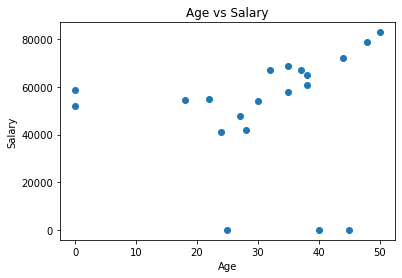

In [19]:
#age vs salary
x, y  = df_numerical['Age'], df_numerical['Salary']
plt.scatter(x, y)
plt.title("Age vs Salary")
plt.xlabel("Age")
plt.ylabel("Salary")
plt.show()

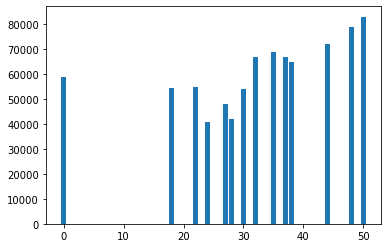

In [20]:
plt.bar(x, y)
plt.show()

In [21]:
#saving the dataframe df_numerical

df.to_csv('saved_df.csv', index = False)

In [23]:
import os
os.listdir()

['.ipynb_checkpoints',
 'data',
 'frames',
 'Lab Assignment 1 - Getting familiar with Data types and Visualization.pdf',
 'Lab_ML_01_a.ipynb',
 'Lab_ML_01_b.ipynb',
 'Lab_ML_01_c.ipynb',
 'saved_df.csv']

In [24]:
load_df = pd.read_csv('saved_df.csv')
load_df

,Country,Age,Salary,Purchased,Price Category Of Purchase
0,France,44.0,72000.0,0,1
1,Spain,27.0,48000.0,1,1
2,Germany,30.0,54000.0,0,2
3,Spain,38.0,61000.0,0,3
4,Germany,40.0,0.0,1,1
5,France,35.0,58000.0,1,2
6,Spain,0.0,52000.0,0,3
7,France,48.0,79000.0,1,1
8,Germany,50.0,83000.0,0,2
9,France,37.0,67000.0,1,2
